<a href="https://colab.research.google.com/github/Giovanni2132/NumberClassificator/blob/main/NumberClassificator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importazione del dataset da openml

In [ ]:
from sklearn.datasets import fetch_openml
mnist=fetch_openml("mnist_784",version=1)
print(mnist.keys())
print(mnist)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])
{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
69995     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69996     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69997     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69998     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.

Ora bisogna convertire i dati in un formato che deve essere manipolato in maniera semplice, si creerà la variabile X che avrà le informazioni per quanto riguarda l'immagine, e la y è la variabile che si vuole predire

In [ ]:
X,y=mnist["data"],mnist["target"]
print(X.head())
print(y.head())

   pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

   pixel10  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
1      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
2      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
3      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
4      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   

   pixel781  pixel782  pixel783  pixel784  
0       0.0       

Bisogna convertire la target variable in un intero di 8 bit

In [ ]:
import numpy as np
from sklearn import preprocessing

y=y.astype(np.uint8)
classes=y.drop_duplicates().sort_values().tolist()

In [ ]:
print(X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Columns: 784 entries, pixel1 to pixel784
dtypes: float64(784)
memory usage: 418.7 MB
None


Ora si divide il dataset in un testset e un trainingset

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (56000, 784)
Number transactions y_train dataset:  (56000,)
Number transactions X_test dataset:  (14000, 784)
Number transactions y_test dataset:  (14000,)


1    7877
7    7293
3    7141
2    6990
9    6958
0    6903
6    6876
8    6825
4    6824
5    6313
Name: class, dtype: int64

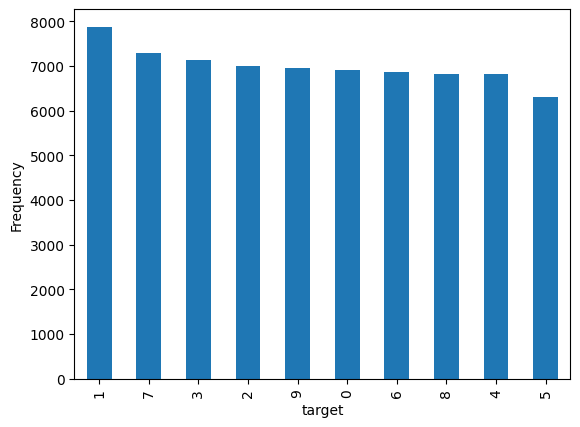

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

pd.value_counts(mnist["target"]).plot.bar()
plt.xlabel('target')
plt.ylabel('Frequency')
mnist["target"].value_counts()

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

num_pipeline=Pipeline([
    ('std_scaler',StandardScaler())
])

X_train_prepared=num_pipeline.fit_transform(X_train)
X_test_prepared=num_pipeline.fit_transform(X_test)

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline

rf_classifier = OneVsRestClassifier(
    make_pipeline(RandomForestClassifier(random_state=42))
)
rf_classifier.fit(X_train_prepared, y_train)

OneVsRestClassifier(estimator=Pipeline(steps=[('randomforestclassifier',
                                               RandomForestClassifier(random_state=42))]))

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics

y_train_pred =  rf_classifier.predict(X_test_prepared)


print(confusion_matrix(y_test, y_train_pred ))


print(classification_report(y_test, y_train_pred ))
print("Accuracy:",metrics.accuracy_score(y_test, y_train_pred ))
print("Precision:",metrics.precision_score(y_test, y_train_pred,average='weighted'))
print("Recall:",metrics.recall_score(y_test, y_train_pred,average='weighted'))

[[1315    0    5    2    1    1    4    1   14    0]
 [   0 1520   15   11    2   11    2    3   36    0]
 [   1    0 1327    7    4    1    4    3   30    3]
 [   1    0   11 1359    1    9    1    9   35    7]
 [   1    0    9    1 1236    1    8    1    9   29]
 [   2    0    1   22    0 1221    8    0   18    1]
 [   4    0    2    0   10   11 1356    0   13    0]
 [   7    1   19    4    8    2    0 1412   11   39]
 [   1    0   11   11    1    4    3    4 1319    3]
 [   5    4    5   16   23    7    0   20   31 1309]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1343
           1       1.00      0.95      0.97      1600
           2       0.94      0.96      0.95      1380
           3       0.95      0.95      0.95      1433
           4       0.96      0.95      0.96      1295
           5       0.96      0.96      0.96      1273
           6       0.98      0.97      0.97      1396
           7       0.97      0.94   